# Carvana Take Home Assessment

## by Boris Chu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
app = pd.read_csv('APR_Strategy_w._Randomized_Experimentation_CSV.csv')

## APR Test Group Data

In [4]:
app.head()

,app_id,fico,apr_test_group,apr,converted to sale,vehicle margin,finance margin
0,1,700,control,4.00%,False,NaN,NaN
1,2,700,test,3.00%,False,NaN,NaN
2,3,700,test,3.00%,False,NaN,NaN
3,4,700,control,4.00%,False,NaN,NaN
4,5,700,control,4.00%,True,1000.0,600.0


In [5]:
app.fico.unique()

array([700, 600], dtype=int64)

In [6]:
app.apr.unique()

array(['4.00%', '3.00%', '4.40%', '5.40%'], dtype=object)

In [7]:
order = ['3.00%', '4.00%', '4.40%', '5.40%']

### APRs per FICO Group

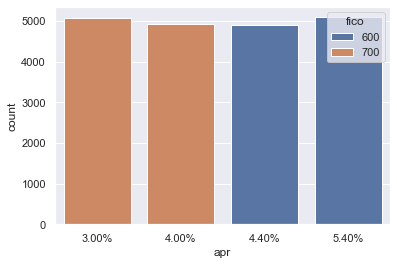

In [8]:
ax = sns.countplot(x='apr', order=order, hue='fico', dodge=False, data=app)

### APRs per Test Group

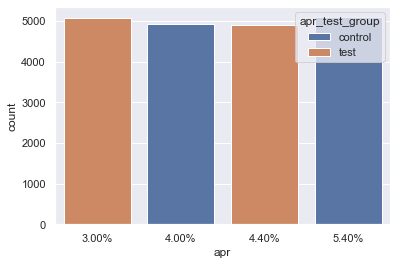

In [9]:
ax = sns.countplot(x='apr', order=order, hue='apr_test_group', dodge=False, data=app)

In [10]:
test_groups = app.pivot_table(values='app_id', index=['apr', 'fico', 'apr_test_group'], aggfunc='count').reset_index()
test_groups.rename(columns={'app_id': 'app_count'}, inplace=True)
test_groups

,apr,fico,apr_test_group,app_count
0,3.00%,700,test,5073
1,4.00%,700,control,4926
2,4.40%,600,test,4906
3,5.40%,600,control,5095


In [11]:
sale = app[app['converted to sale']==True].copy()

In [12]:
# Conversion Rate
(len(sale)/len(app))

0.25105

### Overall conversion rate of 25.1% 

In [13]:
# 600 FICO Conversion Rate
(len(sale[sale['fico']==600])/len(app[app['fico']==600]))

0.22157784221577842

In [14]:
# 700 FICO Conversion Rate
(len(sale[sale['fico']==700])/len(app[app['fico']==700]))

0.28052805280528054

### 22.2% conversion rate for 600 FICO 
### 28.1% conversion rate for 700 FICO

### Conversion rate per APR

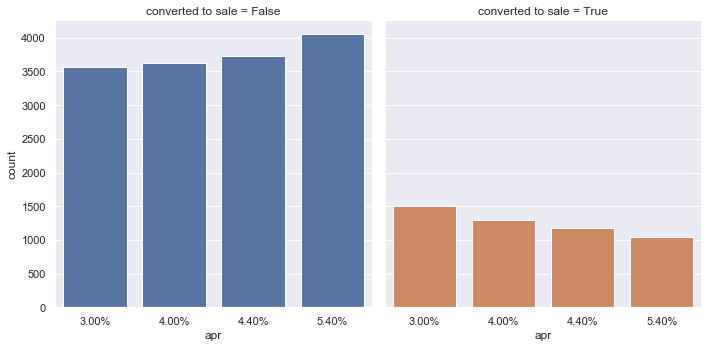

In [15]:
ax = sns.catplot(x='apr', order=order, hue='converted to sale', col='converted to sale', dodge=False, data=app, kind="count")

In [16]:
app.fillna(0, inplace=True)
sale.fillna(0, inplace=True)
app['overall_margin'] = app['vehicle margin'] + app['finance margin']
sale['overall_margin'] = sale['vehicle margin'] + sale['finance margin']

In [17]:
# Overall margin per application
app.overall_margin.sum()/len(app)

373.7575

In [18]:
# Overall margin per sale
sale.overall_margin.sum()/len(sale)

1488.7771360286795

### $373.76 overall margin per application

### $1488.78 overall margin per sale

### Finance margin per APR for sales

In [19]:
finance_apr = sale.pivot_table(values='finance margin', index=['apr'], aggfunc=np.mean).reset_index()
finance_apr

,apr,finance margin
0,3.00%,350.0
1,4.00%,600.0
2,4.40%,400.0
3,5.40%,650.0


### Finance margin per control group for sales

In [20]:
control_test_apr = sale.pivot_table(values='finance margin', index=['apr', 'apr_test_group'], aggfunc=np.mean).reset_index()
control_test_apr

,apr,apr_test_group,finance margin
0,3.00%,test,350.0
1,4.00%,control,600.0
2,4.40%,test,400.0
3,5.40%,control,650.0


### Finance margin per FICO for sales

In [21]:
fico_apr = sale.pivot_table(values='finance margin', index=['fico'], aggfunc=np.mean).reset_index()
fico_apr

,fico,finance margin
0,600,517.779783
1,700,465.864528


In [22]:
test = app[app['apr_test_group']=='test'].copy()
control = app[app['apr_test_group']=='control'].copy()

In [23]:
# 2x2 contingency table for 700 FICO
test_700 = test[test.fico==700].copy()
control_700 = control[control.fico==700].copy()
converts_700 = [[len(control_700[control_700['converted to sale']==True]), len(test_700[test_700['converted to sale']==True])],
                [len(control_700[control_700['converted to sale']==False]), len(test_700[test_700['converted to sale']==False])]]
pd.DataFrame(converts_700, columns=['A (Control)', 'B (Test)'], index=['Converted', 'Not Converted'])

,A (Control),B (Test)
Converted,1300,1505
Not Converted,3626,3568


In [24]:
scipy.stats.fisher_exact(table=converts_700)

(0.8499705889359426, 0.0002840113206546442)

### p=0.000284 for 700 FICO conversions

In [25]:
# 2x2 contingency table for 600 FICO
test_600 = test[test.fico==600].copy()
control_600 = control[control.fico==600].copy()
converts_600 = [[len(control_600[control_600['converted to sale']==True]), len(test_600[test_600['converted to sale']==True])],
                [len(control_600[control_600['converted to sale']==False]), len(test_600[test_600['converted to sale']==False])]]
pd.DataFrame(converts_600, columns=['A (Control)', 'B (Test)'], index=['Converted', 'Not Converted'])

,A (Control),B (Test)
Converted,1044,1172
Not Converted,4051,3734


In [26]:
scipy.stats.fisher_exact(table=converts_600)

(0.8210790240137901, 4.676457623349537e-05)

### p=4.67*10^-5 for 600 FICO conversions

In [27]:
# 700 FICO overall margin t-test
print('Control Avg Overall Margin: ' + '{:.2f}'.format(control_700.overall_margin.mean()) + 
      '\nTest Avg Overall Margin: ' + '{:.2f}'.format(test_700.overall_margin.mean()))
scipy.stats.ttest_ind(control_700.overall_margin, test_700.overall_margin)

Control Avg Overall Margin: 422.25
Test Avg Overall Margin: 400.50


Ttest_indResult(statistic=1.642659180224012, pvalue=0.10048491916767298)

### p=0.1 for 700 FICO overall margin difference of means

In [28]:
# 600 FICO overall margin t-test
print('Control Avg Overall Margin: ' + '{:.2f}'.format(control_600.overall_margin.mean()) + 
      '\nTest Avg Overall Margin: ' + '{:.2f}'.format(test_600.overall_margin.mean()))
scipy.stats.ttest_ind(control_600.overall_margin, test_600.overall_margin)

Control Avg Overall Margin: 338.10
Test Avg Overall Margin: 334.45


Ttest_indResult(statistic=0.28809556225574817, pvalue=0.7732795606635664)

### p=0.77 for 600 FICO overall margin difference of means

In [29]:
app['vehicle margin'].unique()

array([   0., 1000.])

In [30]:
# 700 FICO finance margin t-test
print('Control Avg Finance Margin: ' + '{:.2f}'.format(control_700['finance margin'].mean()) + 
      '\nTest Avg Finance Margin: ' + '{:.2f}'.format(test_700['finance margin'].mean()))
scipy.stats.ttest_ind(control_700['finance margin'], test_700['finance margin'])

Control Avg Finance Margin: 158.34
Test Avg Finance Margin: 103.83


Ttest_indResult(statistic=12.512543970274855, pvalue=1.1784477229898107e-35)

In [31]:
# 600 FICO finance margin t-test
print('Control Avg Finance Margin: ' + '{:.2f}'.format(control_600['finance margin'].mean()) + 
      '\nTest Avg Finance Margin: ' + '{:.2f}'.format(test_600['finance margin'].mean()))
scipy.stats.ttest_ind(control_600['finance margin'], test_600['finance margin'])

Control Avg Finance Margin: 133.19
Test Avg Finance Margin: 95.56


Ttest_indResult(statistic=8.469298792558067, pvalue=2.815920933430941e-17)

### p<<<0.05 for 600  and 700 FICO finance margin difference of means